# Velocity density distribution 

The three dimensional velocity function follows a Maxwell function
$$
f_{gal}(\textbf{v}) = \frac{1}{\sqrt{2 \pi}\sigma_{\nu}} \exp \left(\frac{-|\textbf{v}|^2 } {2\sigma_{\nu}^2}\right)
$$

However, this assumes a static reference frame. In reality the detector is located on the Earth, which rotates, orbits the Sun and moves with the Sun through the Galaxy. This influences the velocity distribution observed at Earth. Since most Dark Matter direct detectors measure for a long time, it is a reasonable approximation to look at just the movement of the Sun through the Galaxy, which is $v_\text{Earth} = 220 \pm 20$ km/s. [1]

$$
 f(\mathbf{v}) = f_\text{Gal}(\mathbf{v}-\mathbf{v}_\text{Earth})
$$

Furthermore, the current detectors are not direction dependent. Therefore, the velocity distribution can be rewritten as a speed distribution. For 

[1] F. J. Kerr and D. Lynden-Bell, “Review of galactic constants,” Mon. Not. Roy. Astron. Soc., vol. 221, p. 1023, 1986.



In [16]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import special,integrate
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

In [27]:
def pdf(v, sigma):
    return 1/(np.sqrt(2*np.pi)*sigma) * np.exp(- np.abs(v)**2 /(2*sigma**2))

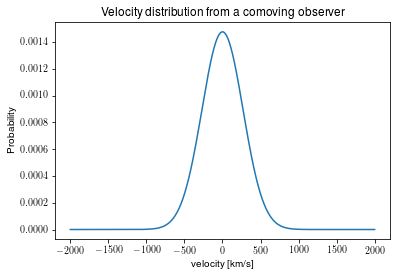

In [28]:
velocity = np.linspace(-2000,2000,1000)
sigma = 270. #km/s
plt.plot(velocity,[pdf(i, sigma) for i in velocity])
plt.title(r"Velocity distribution from a comoving observer")
plt.ylabel(r"Probability")
plt.xlabel(r"velocity [km/s]")
plt.show()

In [34]:
def N_esc(v_esc, sigma):
    a = v_esc**2/(2*sigma**2)
    return special.erf(np.sqrt(a))  - np.sqrt(2/np.pi) * v_esc/sigma *np.exp(-a)

In [36]:
N_esc(500,sigma)

0.6699592534866851

In [37]:
def speed_dist(v, v_e, sigma, v_esc):
    factor = v / (np.sqrt(np.pi*2)*sigma*v_e*N_esc(v_esc, sigma))
    
    if v > v_esc+v_e:
        return 0 
    elif v < v_esc-v_e:
        return factor*(np.exp(-(v-v_e)**2/(2*sigma**2)) - np.exp(-(v+v_e)**2/(2*sigma**2)))
    else:
        return factor*(np.exp(-(v-v_e)**2/(2*sigma**2)) - np.exp(-v_esc**2/(2*sigma**2)))

0.023485027352678767


In [22]:
def pdf_Earth(v, sigma):
    v_earth = 220
    return pdf(v-v_earth, sigma)
    

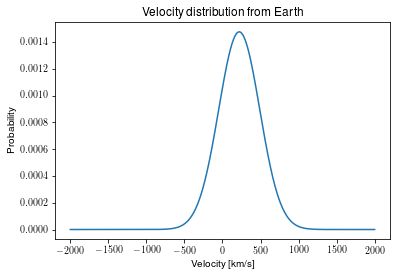

In [23]:
plt.plot(velocity,[pdf_Earth(i, sigma) for i in velocity])
plt.title(r"Velocity distribution from Earth")
plt.ylabel(r"Probability")
plt.xlabel(r"Velocity [km/s]")
plt.show()

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import special,integrate

def pdf(v, sigma):
    return 1/(np.sqrt(2*np.pi)*sigma)* v**2 * np.exp(- np.abs(v)**2 / (2* sigma**2))

In [2]:
sigma = 270.0E3 # m/s

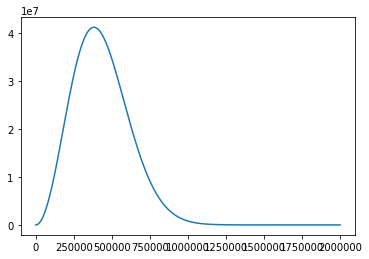

In [3]:
v_range = np.linspace(0,2E6, 1000)
plt.plot(v_range, [pdf(v, sigma) for v in v_range])
plt.show()

# Try velocity

In [ ]:
v_range = np.linspace(0,2E6, 1000)
plt.plot(v_range, [pdf(v, sigma) for v in v_range])
plt.show()

In [ ]:
integrate.quad(lambda v: v*pdf(v,sigma),0,2000)

# Form Factor

In [ ]:
def FSquared(E_R, A):
    s=1
    R=1.2*math.sqrt(A)
    R1=math.sqrt(R**2-5*s**2)
    j_n=special.spherical_jn(1,E_R*R1)
    return (3*j_n/(E_R*R1))**2*math.exp(-E_R**2*s**2)

In [ ]:
FSquared(5,130)

In [ ]:
x=np.linspace(0.1,2,1000)
y=[FSquared(q,130) for q in x]

plt.loglog(x,y)
plt.xlabel("q (fm$^{-1}$)")
plt.ylabel("F$^2$(q)")
plt.show()

\begin{align}
    \sigma_0 &= \dfrac{4\mu_N^2}{\pi}\left[Zf^p+(A-Z)f^n\right]^2\\
    \sigma_{0,P} &= \dfrac{4\mu_N^2}{\pi} \left(f^p\right)^2\\
    \left(f^p\right)^2 &= \dfrac{\pi}{4\mu_N^2} \sigma_{0,P}
\end{align}
where $\mu_N=m_\chi m_N/\left(m_\chi+m_N\right)$

In [ ]:
A=130
m_N = A*1.660539E-27 #kg
m_chi = 100 * 1.780E-27 #kg
mu_N = m_chi*m_N/(m_chi+m_N)
#2*m_N*A**2*f_p**2/(math.pi*v**2)*FSquared(q)

In [ ]:
f_p_2 = math.pi/(4*mu_N**2)
print(f_p_2)

In [ ]:
def dSigma_dER(E_R,v):
    f_p = math.pi/(4*mu_N**2)
    return 2*m_N*A**2*f_p/(math.pi*v**2)*FSquared(E_R,A)

In [ ]:
dSigma_dER(5,4E4)

In [ ]:
x1=np.linspace(0.1,2,1000)
y1=[dSigma_dER(q,4E4) for q in x1]

plt.loglog(x1,y1)
plt.show()

In [ ]:
x2=np.logspace(0,5,1000)
y2=[dSigma_dER(1.2,v) for v in x2]

plt.loglog(x2,y2)
plt.show()

\begin{align}
    &R = \int_{E_T}^\infty dE_R\dfrac{\rho_0}{m_Nm_\chi}\int_{v_{min}}^\infty vf(v)\dfrac{d\sigma_{WN}}{dE_R}dv\\
    &v_{min} = \sqrt{\dfrac{m_NE_R}{2\mu_N^2}}\\
    &\mu_N = \dfrac{m_\chi m_N}{m_\chi + m_N}
\end{align}

In [ ]:
E_R=1.2

In [ ]:
integrate.quad(lambda v: v*pdf(v,sigma),0,2000)